In [4]:
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [2]:
def read_corpus_to_dataframe(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                token, label = parts
                data.append({'token': token, 'label': label})
                
    return pd.DataFrame(data)

In [15]:
df_train = read_corpus_to_dataframe('./data/es-en/train.conll')
df_dev = read_corpus_to_dataframe('./data/es-en/dev.conll')
df_train.head()
#df_train['label']

,token,label
0,11:11,other
1,.....,other
2,make,lang1
3,a,lang1
4,wish,lang1


In [5]:
X_train, y_train = df_train['token'], df_train['label']
X_dev, y_dev = df_dev['token'], df_dev['label']

# vectorization + classfieur svm
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=1, max_df=0.5, ngram_range=(1,3))),
    ('sclf', LogisticRegression(random_state=42))
])

In [6]:
pipeline.fit(X_train, y_train)

/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.5, ngram_range=(1, 3))),
                ('sclf', LogisticRegression(random_state=42))])

In [8]:
predictions = pipeline.predict(X_dev)
print(classification_report(y_dev, predictions))

/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   ambiguous       0.00      0.00      0.00        39
          fw       0.00      0.00      0.00         2
       lang1       0.99      0.81      0.89     16712
       lang2       0.96      0.82      0.89     14955
       mixed       0.00      0.00      0.00         6
          ne       0.94      0.25      0.40       815
       other       0.57      1.00      0.73      7830
         unk       0.00      0.00      0.00        32

    accuracy                           0.84     40391
   macro avg       0.43      0.36      0.36     40391
weighted avg       0.89      0.84      0.85     40391



/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


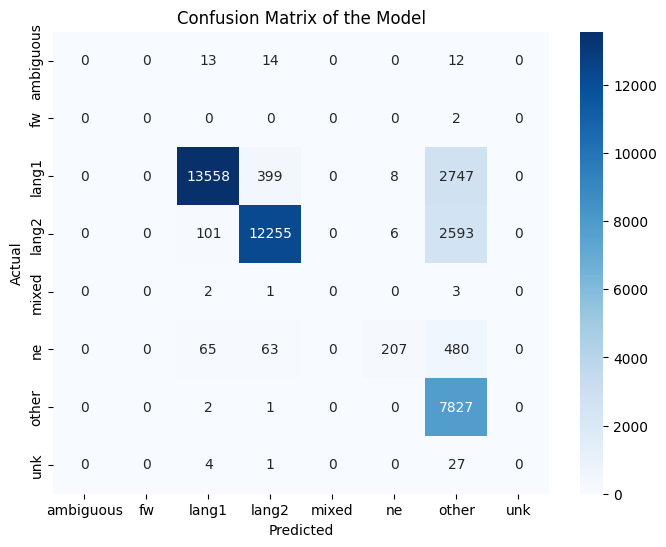

In [23]:
unique_classes = np.unique(np.concatenate((y_train, y_dev)))
cm = confusion_matrix(y_dev, predictions, labels=unique_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()